# Automatidata project 5

***

## Project Description

You are the newest member of Automatidata’s data analytics team. Your team is more than halfway through their project for the New York City Taxi & Limousine Commission (TLC). Earlier, you completed a project proposal, used Python to explore and analyze the TLC dataset, created data visualizations, and conducted an A/B test. Now, the New York City TLC wants your team to build a multiple linear regression (MLR) model for ride durations based on a variety of variables.

To answer your question, we will create and run a multiple linear regression (MLR) model to get the most accurate prediction. Because we want to predict ride duration based on multiple variables, including time of day and pickup and dropoff location, MLR will be our confirmation of how best to proceed with the ML algorithm in the final phase of the project. 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| ID |	Trip identification number |
| VendorID |	A code indicating the TPEP provider that provided the record.  |
| tpep_pickup_datetime |	The date and time when the meter was engaged. |
| tpep_dropoff_datetime |	The date and time when the meter was disengaged. |
| Passenger_count |The number of passengers in the vehicle	|
| Trip_distance | The elapsed trip distance in miles reported by the taximeter.	|
| PULocationID | TLC Taxi Zone in which the taximeter was engaged.	|
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged.	|
| RateCodeID | The final rate code in effect at the end of the trip	|
| Store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor	|
| Payment_type  | A numeric code signifying how the passenger paid for the trip	|
| Fare_amount | The time-and-distance fare calculated by the meter.	|
| Extra  | Miscellaneous extras and surcharges	|
| MTA_tax |	0.50 MTA tax that is automatically triggered based on the metered  rate in use |
| Improvement_surcharge |	0.30 improvement surcharge assessed trips at the flag drop |
| Tip_amount |	Tip amount – This field is automatically populated for credit card  tips. Cash tips are not included. |
| Tolls_amount |	Total amount of all tolls paid in trip. |
| Total_amount |	The total amount charged to passengers. Does not include cash tips. |

## Data sources used

This project uses a dataset called Automatidata_data.csv. It contains data gathered by the New York City Taxi & Limousine Commission. For each trip, there are many different data variables gathered. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats
from collections import Counter

import sklearn
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, plot_tree
#from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library

import feature_engine
from feature_engine import imputation as mdi
from feature_engine.outliers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
#from feature_engine.discretisation import ArbitraryDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Yellow_Taxi_Trip_Data.csv", parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.00,1.00,0.50,0.00,0.00,0.30,5.80
22695,2,2017-08-06 16:43:00,2017-08-06 17:24:00,1,16.71,2,N,132,164,1,52.00,0.00,0.50,14.64,5.76,0.30,73.20
22696,2,2017-09-04 14:54:00,2017-09-04 14:58:00,1,0.42,1,N,107,234,2,4.50,0.00,0.50,0.00,0.00,0.30,5.30
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.50,0.00,0.50,1.70,0.00,0.30,13.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

In [5]:
df.describe(include='all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.00,22699,22699,22699.00,22699.00,22699.00,22699,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00
unique,NaN,22435,22451,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2017-02-01 21:08:00,2017-11-08 22:34:00,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,3,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2017-01-01 00:08:00,2017-01-01 00:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.56,NaN,NaN,1.64,2.91,1.04,NaN,162.41,161.53,1.34,13.03,0.33,0.50,1.84,0.31,0.30,16.31
std,0.50,NaN,NaN,1.29,3.65,0.71,NaN,66.63,70.14,0.50,13.24,0.46,0.04,2.80,1.40,0.02,16.10
min,1.00,NaN,NaN,0.00,0.00,1.00,NaN,1.00,1.00,1.00,-120.00,-1.00,-0.50,0.00,0.00,-0.30,-120.30
25%,1.00,NaN,NaN,1.00,0.99,1.00,NaN,114.00,112.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.75


In [6]:
df.shape

(22699, 17)

In [7]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'], dtype='object')

## Data Visualization

### Univariate Data Exploration

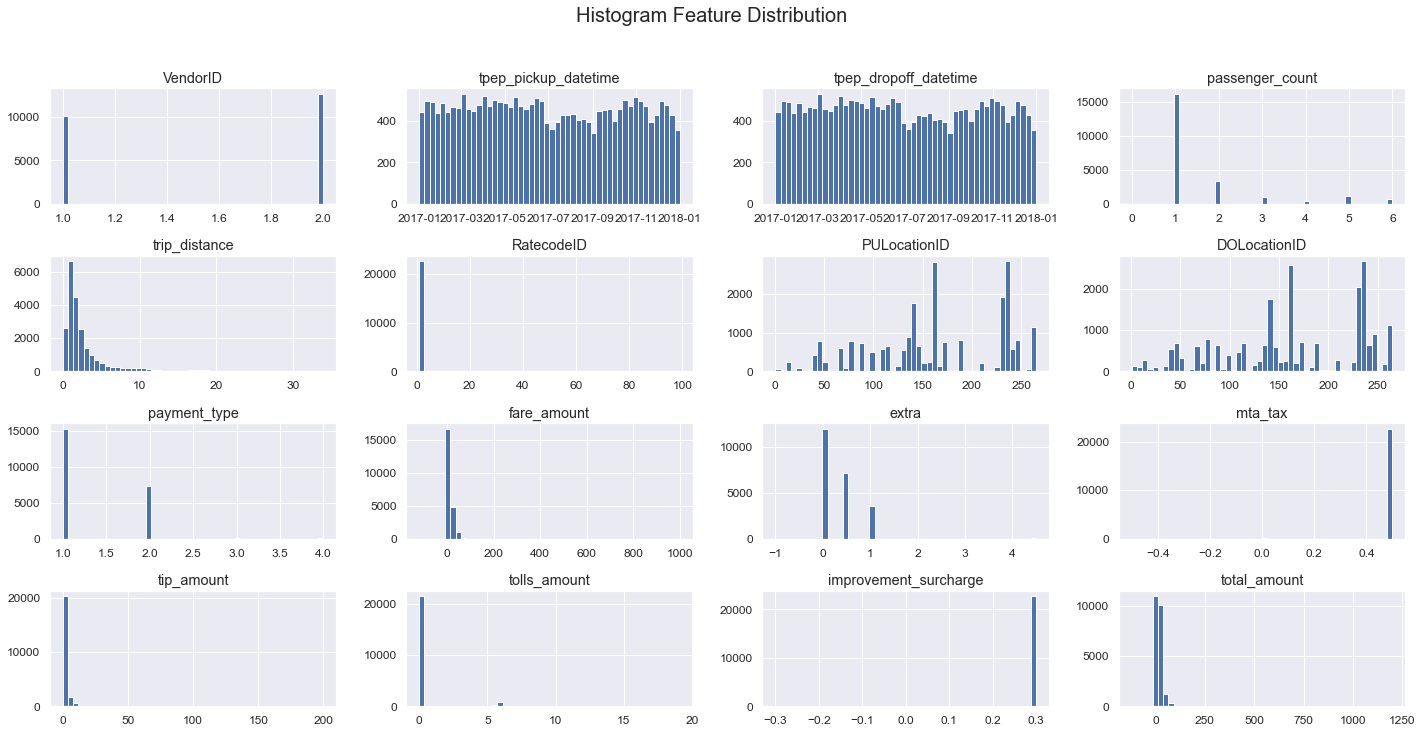

In [8]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

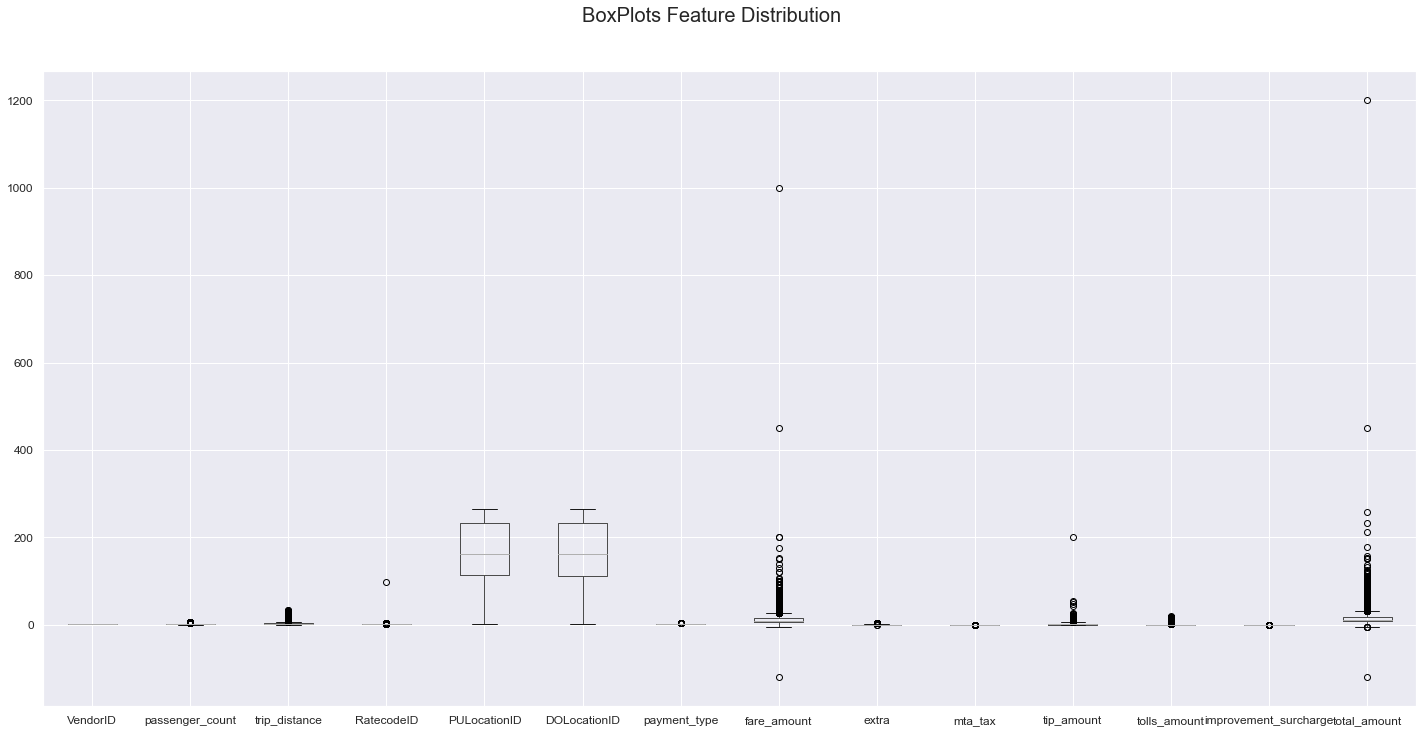

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Data Engineering

In [10]:
df["tdiff"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [11]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tdiff
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,0 days 00:14:04
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,0 days 00:26:00
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,0 days 00:07:12
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,0 days 00:31:00
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,0 days 00:16:43


In [12]:
df["seconds"] = df['tdiff'].dt.total_seconds()

In [13]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tdiff,seconds
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,0 days 00:14:04,844.00
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,0 days 00:26:00,1560.00
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,0 days 00:07:12,432.00
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,0 days 00:31:00,1860.00
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,0 days 00:16:43,1003.00


### Drop unwanted features

In [14]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'tdiff', 'seconds'], dtype='object')

In [15]:
df.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag', 
         'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 
         'tolls_amount', 'improvement_surcharge', 'tdiff'], axis=1, inplace=True)

In [16]:
df

,passenger_count,trip_distance,tip_amount,total_amount,seconds
0,6,3.34,2.76,16.56,844.00
1,1,1.80,4.00,20.80,1560.00
2,1,1.00,1.45,8.75,432.00
3,1,3.70,6.39,27.69,1860.00
4,1,4.37,0.00,17.80,1003.00
...,...,...,...,...,...
22694,3,0.61,0.00,5.80,196.00
22695,1,16.71,14.64,73.20,2460.00
22696,1,0.42,0.00,5.30,240.00
22697,1,2.36,1.70,13.00,716.00


### Treat Missing Values

In [17]:
df.isnull().sum()

passenger_count    0
trip_distance      0
tip_amount         0
total_amount       0
seconds            0
dtype: int64

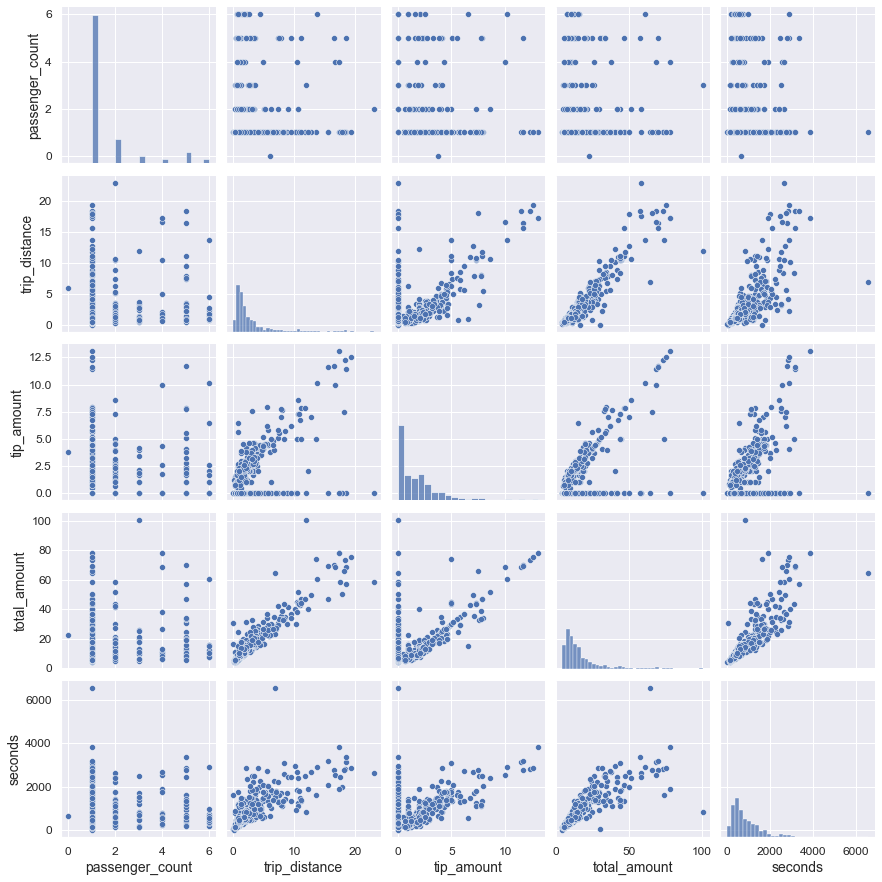

In [18]:
# Create pairwise scatterplots of data set
sns.pairplot(df.sample(500))

plt.show()

### Treat Outliers

In [19]:
df.describe()

,passenger_count,trip_distance,tip_amount,total_amount,seconds
count,22699.00,22699.00,22699.00,22699.00,22699.00
mean,1.64,2.91,1.84,16.31,1020.65
std,1.29,3.65,2.80,16.10,3719.79
min,0.00,0.00,0.00,-120.30,-1020.00
25%,1.00,0.99,0.00,8.75,405.00
50%,1.00,1.61,1.35,11.80,660.00
75%,2.00,3.06,2.45,17.80,1095.50
max,6.00,33.96,200.00,1200.29,86400.00


In [20]:
windsorizer = Winsorizer(capping_method='gaussian', tail='left', fold= 0.1, variables=['total_amount'])

In [21]:
windsorizer.fit(df)

Winsorizer(fold=0.1, tail='left', variables=['total_amount'])

In [22]:
df2 = windsorizer.transform(df)

In [23]:
df2

,passenger_count,trip_distance,tip_amount,total_amount,seconds
0,6,3.34,2.76,16.56,844.00
1,1,1.80,4.00,20.80,1560.00
2,1,1.00,1.45,14.70,432.00
3,1,3.70,6.39,27.69,1860.00
4,1,4.37,0.00,17.80,1003.00
...,...,...,...,...,...
22694,3,0.61,0.00,14.70,196.00
22695,1,16.71,14.64,73.20,2460.00
22696,1,0.42,0.00,14.70,240.00
22697,1,2.36,1.70,14.70,716.00


In [24]:
df2.describe()

,passenger_count,trip_distance,tip_amount,total_amount,seconds
count,22699.00,22699.00,22699.00,22699.00,22699.00
mean,1.64,2.91,1.84,19.64,1020.65
std,1.29,3.65,2.80,14.65,3719.79
min,0.00,0.00,0.00,14.70,-1020.00
25%,1.00,0.99,0.00,14.70,405.00
50%,1.00,1.61,1.35,14.70,660.00
75%,2.00,3.06,2.45,17.80,1095.50
max,6.00,33.96,200.00,1200.29,86400.00


In [25]:
windsorizer.left_tail_caps_

{'total_amount': 14.700808153250637}

In [26]:
windsorizer.right_tail_caps_

{}

In [27]:
df2.head()

,passenger_count,trip_distance,tip_amount,total_amount,seconds
0,6,3.34,2.76,16.56,844.00
1,1,1.80,4.00,20.80,1560.00
2,1,1.00,1.45,14.70,432.00
3,1,3.70,6.39,27.69,1860.00
4,1,4.37,0.00,17.80,1003.00


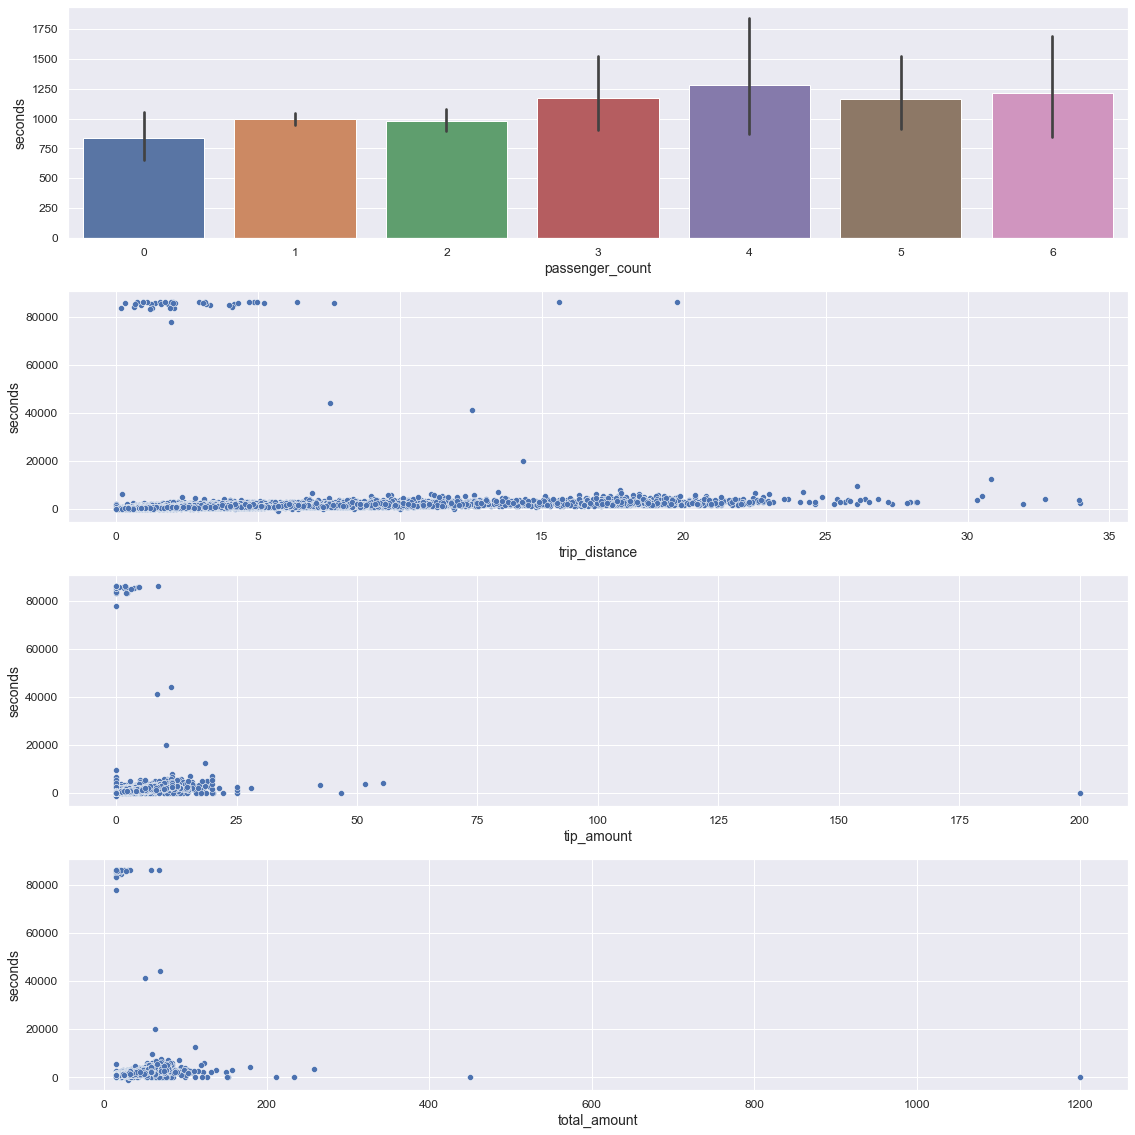

In [28]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,16))
#fig.suptitle('Main Title')


sns.barplot(x="passenger_count", y="seconds", data=df2, ax=ax[0])
#ax[0].set_title('passenger_count')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("passenger_count")
ax[0].set_ylabel("seconds")

sns.scatterplot(x="trip_distance", y="seconds", data=df2, ax=ax[1])
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("trip_distance")
ax[1].set_ylabel("seconds")

sns.scatterplot(x="tip_amount", y="seconds", data=df2, ax=ax[2])
#ax[2].set_title('Title of the third chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("tip_amount")
ax[2].set_ylabel("seconds")

sns.scatterplot(x="total_amount", y="seconds", data=df2, ax=ax[3])
#ax[3].set_title('Title of the fourth chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("total_amount")
ax[3].set_ylabel("seconds")

plt.tight_layout()
plt.show()


### Correlation

In [29]:
df2.corr()

,passenger_count,trip_distance,tip_amount,total_amount,seconds
passenger_count,1.00,0.02,-0.01,0.01,0.02
trip_distance,0.02,1.00,0.50,0.72,0.15
tip_amount,-0.01,0.50,1.00,0.76,0.07
total_amount,0.01,0.72,0.76,1.00,0.12
seconds,0.02,0.15,0.07,0.12,1.00


In [30]:
df2.corr()["seconds"].sort_values()

passenger_count   0.02
tip_amount        0.07
total_amount      0.12
trip_distance     0.15
seconds           1.00
Name: seconds, dtype: float64

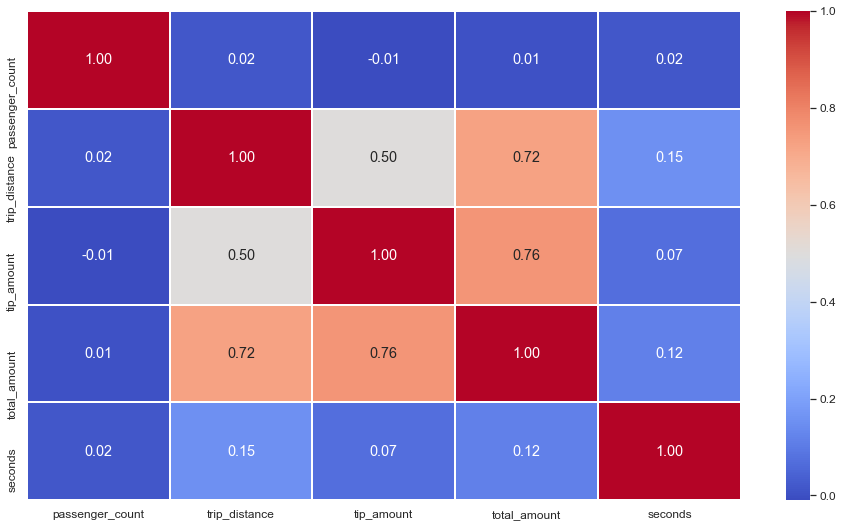

In [31]:
plt.figure(figsize=(16,9))
sns.heatmap(df2.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

### Remove Non-Linear features

In [32]:
df2.drop(['passenger_count'], axis=1, inplace=True)

In [33]:
df2.head()

,trip_distance,tip_amount,total_amount,seconds
0,3.34,2.76,16.56,844.00
1,1.80,4.00,20.80,1560.00
2,1.00,1.45,14.70,432.00
3,3.70,6.39,27.69,1860.00
4,4.37,0.00,17.80,1003.00


### Create and save processed dataset

In [34]:
df2.to_csv("taxi.csv",index=False)

In [35]:
df2.shape

(22699, 4)

### Train Test Split

In [36]:
X = df2.iloc[:,:3]
y = df2.iloc[:,3]

In [37]:
X.values, y.values

(array([[ 3.34      ,  2.76      , 16.56      ],
        [ 1.8       ,  4.        , 20.8       ],
        [ 1.        ,  1.45      , 14.70080815],
        ...,
        [ 0.42      ,  0.        , 14.70080815],
        [ 2.36      ,  1.7       , 14.70080815],
        [ 2.1       ,  2.35      , 14.70080815]]),
 array([ 844., 1560.,  432., ...,  240.,  716.,  840.]))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18159, 3), (4540, 3), (18159,), (4540,))

## Feature Scaling

In [40]:
X_train

,trip_distance,tip_amount,total_amount
252,6.02,0.00,20.80
16220,0.66,1.00,14.70
9795,1.40,1.00,14.70
1972,0.50,0.00,14.70
21092,1.00,1.85,14.70
...,...,...,...
13123,2.80,0.00,20.80
19648,1.91,2.94,14.70
9845,1.80,0.00,14.70
10799,0.80,0.00,14.70


In [41]:
scaler = StandardScaler()

In [42]:
X_train_scaled = scaler.fit_transform(X_train)

In [43]:
X_test_scaled = scaler.transform(X_test)

In [44]:
X_train_scaled

array([[ 0.84707765, -0.63606264,  0.07259898],
       [-0.61448894, -0.29182251, -0.32521563],
       [-0.41270549, -0.29182251, -0.32521563],
       ...,
       [-0.30363336, -0.63606264, -0.32521563],
       [-0.57631369, -0.63606264, -0.32521563],
       [ 0.43533034, -0.63606264,  0.59439219]])

In [45]:
X_test_scaled

array([[ 0.04812427,  0.22453768, -0.12307347],
       [ 0.32353141, -0.63606264,  0.59439219],
       [-0.59812812, -0.20232008, -0.32521563],
       ...,
       [-0.46724156, -0.63606264, -0.32521563],
       [-0.57631369, -0.29182251, -0.32521563],
       [-0.37725705,  0.004224  , -0.32521563]])

## Model Training

## Using Regression Models

In [46]:
reg_model = LinearRegression()

In [47]:
reg_model.fit(X_train_scaled,y_train)

LinearRegression()

In [48]:
y_pred = reg_model.predict(X_test_scaled)

In [49]:
y_pred

array([1023.69384793, 1308.25142607,  676.20524508, ...,  782.45602399,
        695.22330023,  784.09793085])

### Model Evaluation (Regression)

In [50]:
mse = mean_squared_error(y_test,y_pred)
mse

11305721.688891325

In [51]:
rmse = np.sqrt(mse)
rmse

3362.39820498574

In [52]:
r2score = r2_score(y_test,y_pred)
r2score

0.023214949627792913

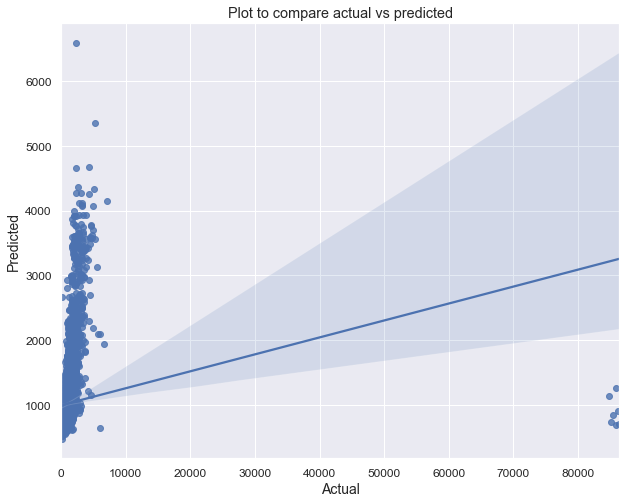

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Table Formatted View

In [54]:
table = X_test.copy()

In [55]:
table["True Value"] = y_test.copy()

In [56]:
table["Predicted"] = np.round(y_pred,2)

In [57]:
table

,trip_distance,tip_amount,total_amount,True Value,Predicted
5818,3.09,2.50,17.80,1080.00,1023.69
18134,4.10,0.00,28.80,2852.00,1308.25
4655,0.72,1.26,14.70,353.00,676.21
7378,4.49,0.00,16.80,957.00,1296.91
13914,2.00,0.00,14.70,660.00,904.54
...,...,...,...,...,...
11108,6.20,4.45,26.75,1108.00,1500.06
7840,0.53,1.26,14.70,360.00,647.21
8,1.20,0.00,14.70,720.00,782.46
16996,0.80,1.00,14.70,540.00,695.22


### Cross-Validation

In [58]:
cv = cross_val_score(reg_model,X,y,cv=5,verbose=1,scoring='neg_mean_squared_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [59]:
cv.mean()

-13512904.201623008

In [60]:
df2.columns

Index(['trip_distance', 'tip_amount', 'total_amount', 'seconds'], dtype='object')

In [61]:
# Define the OLS formula.

### YOUR CODE HERE ### 

ols_formula = 'seconds ~ trip_distance + tip_amount + total_amount'

# Create an OLS model.

### YOUR CODE HERE ### 

OLS = ols(formula = ols_formula, data = df2)

# Fit the model.

### YOUR CODE HERE ### 

model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 

model_results = model.summary()

# Display the model results.

### YOUR CODE HERE ### 

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                seconds   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     184.7
Date:                Thu, 13 Apr 2023   Prob (F-statistic):          2.53e-118
Time:                        09:09:00   Log-Likelihood:            -2.1855e+05
No. Observations:               22699   AIC:                         4.371e+05
Df Residuals:                   22695   BIC:                         4.371e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       506.9726     43.661     11.612      0.000     421.394     592.551
trip_distance   146.8134      9.740     15.073      0.000     127.721     165.905
tip_amount      -27.1844     13.455     -2.020      0.043     -53.558      -0.811
total_amount      6.9172      3.225      2.145      0.032       0.596      13.239
==============================================================================
Omnibus:                    51823.455   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        247571019.582
Skew:                          22.416   Prob(JB):                         0.00
Kurtosis:                     512.657   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

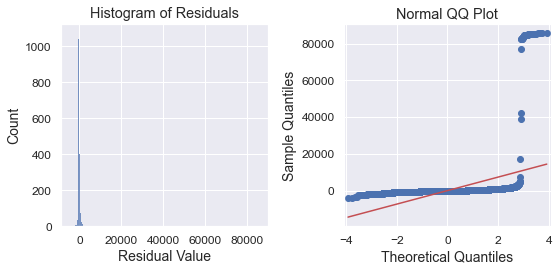

In [62]:
# Calculate the residuals.

### YOUR CODE HERE ### 

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

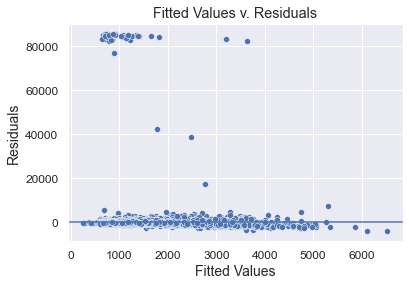

In [63]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot.
plt.show()

In [64]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = df2[['trip_distance', 'tip_amount', 'total_amount']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
trip_distance,3.37
tip_amount,3.05
total_amount,5.65


LR model not suitable to be used here

#### Python code done by Dennis Lam